<a href="https://colab.research.google.com/github/fenix77r/CursoPython/blob/main/Parcial_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
#Importar Librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [134]:
dataset = pd.read_csv('/content/sample_data/crime_data.csv')
dataset = dataset.rename(columns={'Unnamed: 0': 'State'})
dataset

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


1. ¿Cómo podemos agrupar los estados?

Para agrupar los estados, utilizaré las variables proporcionadas (Murder, Assault, UrbanPop y Rape) para realizar un análisis de conglomerados K-Means.

In [135]:
X = dataset[['Murder', 'Assault', 'UrbanPop', 'Rape']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


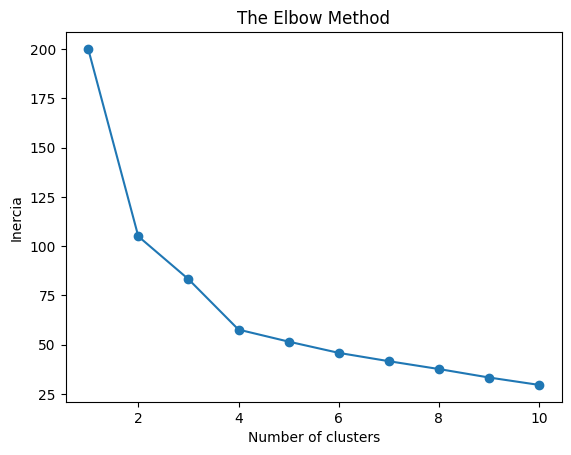

In [136]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)

    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inercia')
plt.show()

In [137]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)
y_kmeans = kmeans.fit_predict(X_scaled)

dataset




,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [138]:
X_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

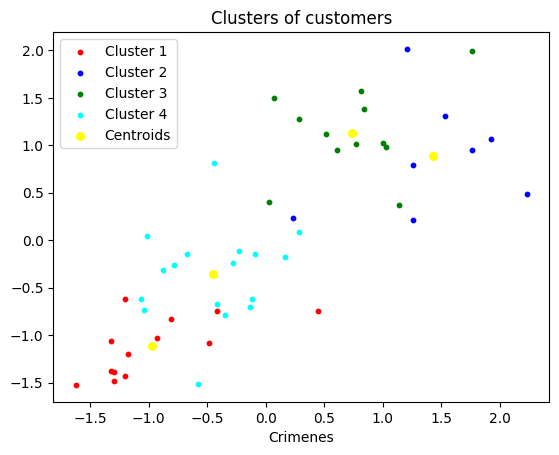

In [139]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Crimenes')
plt.legend()
plt.show()



In [140]:
# Identificar estados con necesidad de profesionales con mayor capacidad
# (Asumiendo que 'Murder' y 'Assault' son indicadores de crímenes violentos)
dataset['Indice_Crimen'] = dataset['Murder'] + dataset['Assault']
print("\nEstados con Mayor Necesidad de Profesionales Capacitados:\n")
print(dataset[['State', 'Indice_Crimen']].sort_values(by='Indice_Crimen', ascending=False).head().to_markdown(index=False, numalign="left", stralign="left"))


Estados con Mayor Necesidad de Profesionales Capacitados:

| State          | Indice_Crimen   |
|:---------------|:----------------|
| Florida        | 350.4           |
| North Carolina | 350             |
| Maryland       | 311.3           |
| Arizona        | 302.1           |
| New Mexico     | 296.4           |


In [143]:
# Asignar policias a cada estado
def asignar_recursos(row):
    cluster = row['Cluster']
    crime_index = row['Indice_Crimen']

    if crime_index > dataset['Indice_Crimen'].quantile(0.75):
        return 'Policías capacitados (alta prioridad)'
    elif crime_index > dataset['Indice_Crimen'].quantile(0.5):
        return 'Policías de a pie y algunos cadetes'
    else:
        return 'Cadetes y algunos policías de a pie'

dataset['Recursos'] = dataset.apply(asignar_recursos, axis=1)

# Mostrar resultados
print(dataset[['State', 'Cluster', 'Indice_Crimen', 'Recursos']].to_markdown(index=False, numalign="left", stralign="left"))



| State          | Cluster   | Indice_Crimen   | Recursos                              |
|:---------------|:----------|:----------------|:--------------------------------------|
| Alabama        | 1         | 249.2           | Policías de a pie y algunos cadetes   |
| Alaska         | 2         | 273             | Policías capacitados (alta prioridad) |
| Arizona        | 2         | 302.1           | Policías capacitados (alta prioridad) |
| Arkansas       | 1         | 198.8           | Policías de a pie y algunos cadetes   |
| California     | 2         | 285             | Policías capacitados (alta prioridad) |
| Colorado       | 2         | 211.9           | Policías de a pie y algunos cadetes   |
| Connecticut    | 3         | 113.3           | Cadetes y algunos policías de a pie   |
| Delaware       | 3         | 243.9           | Policías de a pie y algunos cadetes   |
| Florida        | 2         | 350.4           | Policías capacitados (alta prioridad) |
| Georgia        | 1 